# CS506 Project Main Report

## Chengyu Deng, Xiaotong Niu, Qian Zhang

This Jupyter Notebook is the code for the CS506 Initial Report. We processed the main data set and make it ready to use for analysis. 


**Part 1 Data processing**

We used Building Energy Reporting And Disclosure Ordinance (BERDO) data provided by [Analyze Boston - Boston.gov](https://data.boston.gov/) to do the analysis. 
* **_berdo2017.csv_** for the year of 2017.
* **_2016-reported-energy-and-water-metrics.xlsx_** for the year of 2016.
* **_2015-reported-energy-and-water-metrics.xlsx_** for the year of 2015.

The source of the data is: https://data.boston.gov/dataset/building-energy-reporting-and-disclosure-ordinance


In [1]:
# Import data 
import csv
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")


In [2]:
# Put data into Pandas dataframes

# 2015 xlsx -> csv
data_2015_xlsx = pd.read_excel('2015-reported-energy-and-water-metrics.xlsx', index_col=None)
data_2015_xlsx.to_csv('berdo2015.csv')

# 2016 xlsx -> csv
data_2016_xlsx = pd.read_excel('2016-reported-energy-and-water-metrics.xlsx', index_col=None)
data_2016_xlsx.to_csv('berdo2016.csv')

# 2017
df_2015 = pd.read_csv('berdo2015.csv')
df_2016 = pd.read_csv('berdo2016.csv')
df_2017 = pd.read_csv('berdo2017.csv', encoding = "ISO-8859-1")


# Testing code (For debugging purpose)

# print(type(df_2015))
# print(type(df_2016))
# print(type(df_2017))
# print('-------------------------------')
# print(df_2015.shape)
# print(df_2016.shape)
# print(df_2017.shape)
# print('-------------------------------')
# print(list(df_2015.columns.values))
# print('-------------------------------')
# print(list(df_2016.columns.values))
# print('-------------------------------')
# print(list(df_2017.columns.values))
# print('-------------------------------')

In [3]:
# Data Trimming

# Dataframe columns names handling
if 'Years Reported' in df_2016:
    df_2016.drop('Years Reported', axis = 1, inplace = True)
if 'Years Reported' in df_2017:
    df_2017.drop('Years Reported', axis = 1, inplace = True)

if ' Gross Area (sq ft) ' in df_2017:
    df_2017.rename(index=str, columns={' Gross Area (sq ft) ': 'Gross Area (sq ft)'}, inplace = True)
if ' GHG Emissions (MTCO2e) ' in df_2017:
    df_2017.rename(index=str, columns={' GHG Emissions (MTCO2e) ': 'GHG Emissions (MTCO2e)'}, inplace = True)
if ' Total Site Energy (kBTU) ' in df_2017:
    df_2017.rename(index=str, columns={' Total Site Energy (kBTU) ': 'Total Site Energy (kBTU)'}, inplace = True)
if ' Onsite Renewable (kWh) ' in df_2017:
    df_2017.rename(index=str, columns={' Onsite Renewable (kWh) ': 'Onsite Renewable (kWh)'}, inplace = True)

    
# Testing code (For debugging purpose)

# print(type(df_2015))
# print(type(df_2016))
# print(type(df_2017))
# print(df_2015.shape)
# print(df_2016.shape)
# print(df_2017.shape)
# print('-------------------------------')
# print(list(df_2015.columns.values))
# print('-------------------------------')
# print(list(df_2016.columns.values))
# print('-------------------------------')
# print(list(df_2017.columns.values))
# print('-------------------------------')


# Select properties which belong to BU
with open("BU_Property_List.csv", 'r') as propertyFile:
    reader = csv.reader(propertyFile, delimiter='\t')
    propertyList_convol = list(reader)
    
    propertyList = []
    for each in propertyList_convol:
        for element in each:
            propertyList.append(element)
            
df2015_BU = df_2015.loc[df_2015['Property Name'].isin(propertyList)]
df2016_BU = df_2016.loc[df_2016['Property Name'].isin(propertyList)]
df2017_BU = df_2017.loc[df_2017['Property Name'].isin(propertyList)]

# Testing code (For debugging purpose)

print('BU properties ------------------------------------')
print(df2015_BU.shape)
print(df2016_BU.shape)
print(df2017_BU.shape)

# Drop rows of data whose Site EUI (kBTU/sf) is not available

df2015_BU = df2015_BU.loc[df_2015['Site EUI (kBTU/sf)'] != 'Not Available']
df2016_BU = df2016_BU.loc[df_2016['Site EUI (kBTU/sf)'] != 'Not Available']
df2017_BU = df2017_BU.loc[df_2017['Site EUI (kBTU/sf)'] != 'Not Available']

# Testing code (For debugging purpose)

# print(len(propertyList))
# print('------------------------------------')
# print(propertyList)
# print('------------------------------------')
# # print(df2015_BU)
# # print(df2016_BU)
# # print(df2017_BU)
print('BU properties Site EUI (kBTU/sf)] != Not Available----')
print(df2015_BU.shape)
print(df2016_BU.shape)
print(df2017_BU.shape)
print('------------------------------------')
print(list(df_2015.columns.values))
print('------------------------------------')
# print(df2015_BU['Property Name'])
# print(df2016_BU['Property Name'])
# print(df2017_BU['Property Name'])
# print('------------------------------------')
# print(df2017_BU[['Site EUI (kBTU/sf)', '% Electricity', '% Gas', '% Steam']])

BU properties ------------------------------------
(55, 23)
(56, 23)
(59, 23)
BU properties Site EUI (kBTU/sf)] != Not Available----
(37, 23)
(54, 23)
(57, 23)
------------------------------------
['Unnamed: 0', 'Property Name', 'Reported', 'Property Type', 'Address', 'ZIP', 'Gross Area (sq ft)', 'Site EUI (kBTU/sf)', 'Energy Star Score', 'Energy Star Certified', 'Property Uses', 'Year Built', 'GHG Emissions (MTCO2e)', 'GHG Intensity (kgCO2/sf)', 'Total Site Energy (kBTU)', '% Electricity', '% Gas', '% Steam', 'Water Intensity (gal/sf)', 'Onsite Solar (kWh)', 'User Submitted Info', 'User Submitted Link', 'Tax Parcel']
------------------------------------


**Part 2 Monthly energy consumption assignment**

Since the BERDO data is yearly based, we need to calculate the monthly energy consumption for each building based on the energy consumption distribution provided by Kevin Zheng from Sustainability@BU

In [4]:
# Calculate monthly energy consumption electricity/natrual gas

#[Jan, Feb, Mar, ..., Nov, Dec]
share_2015 = np.array([0.2038, 0.1062, 0.0778, 0.0620, 0.0589, 0.0588, 0.0473, 0.0813, 0.0705, 0.0732, 0.0673, 0.0929])
share_2016 = np.array([0.0919, 0.1179, 0.0995, 0.0642, 0.0710, 0.0733, 0.0660, 0.0673, 0.0733, 0.0774, 0.0959, 0.1023])
share_2017 = np.array([0.1146, 0.1031, 0.0872, 0.0862, 0.0699, 0.0650, 0.0661, 0.0635, 0.0865, 0.0671, 0.0727, 0.1181])

#          Jan                               Dec
#[[Natural Gas, Electricity], ...[Natural Gas, Electricity]]
NESplits_2015 = np.array(
    [[0.6877, 0.3123], 
     [0.6654, 0.3346], 
     [0.6079, 0.3921], 
     [0.5086, 0.4914], 
     [0.3888, 0.6112], 
     [0.3663, 0.6337], 
     [0.1913, 0.8087], 
     [0.5173, 0.4827], 
     [0.5090, 0.4910], 
     [0.5598, 0.4402], 
     [0.5245, 0.4755], 
     [0.6743, 0.3257]])

NESplits_2016 = np.array(
    [[0.6519, 0.3481], 
     [0.6802, 0.3198], 
     [0.6496, 0.3504], 
     [0.5395, 0.4605], 
     [0.4350, 0.5650], 
     [0.4154, 0.5846], 
     [0.3339, 0.6661], 
     [0.3336, 0.6664], 
     [0.4442, 0.5558], 
     [0.5321, 0.4679], 
     [0.6225, 0.3775], 
     [0.6477, 0.3523]])

NESplits_2017 = np.array(
    [[0.6739, 0.3261], 
     [0.6707, 0.3293], 
     [0.6211, 0.3789], 
     [0.5920, 0.4080], 
     [0.5074, 0.4926], 
     [0.3905, 0.6095], 
     [0.3199, 0.6801], 
     [0.3178, 0.6822],
     [0.3672, 0.6328], 
     [0.3960, 0.6040],  
     [0.5386, 0.4614], 
     [0.6525, 0.3475]])


# Testing code (For debugging purpose)
# print(np.sum(share_2015))
# print(np.sum(share_2016))
# print(np.sum(share_2017))
# print('------------------------------------')
# print(np.sum(NESplits_2015))
# print(np.sum(NESplits_2016))
# print(np.sum(NESplits_2017))
# print('------------------------------------')
# print(share_2015.shape) -> (12, )
# print(share_2016.shape) -> (12, )
# print(share_2017.shape) -> (12, )

# Change (12, ) to (12, 1) since the we can not do matrix multiplication with shape (12, ) 
share_2015 = np.reshape(share_2015, (share_2015.shape[0], 1))
share_2016 = np.reshape(share_2016, (share_2016.shape[0], 1))
share_2017 = np.reshape(share_2017, (share_2017.shape[0], 1))


# Testing code (For debugging purpose)

# print('------------------------------------')
# print(share_2015.shape)
# print(share_2016.shape)
# print(share_2017.shape)
# print('------------------------------------')
# print(NESplits_2015.shape)
# print(NESplits_2016.shape)
# print(NESplits_2017.shape)

share_2015_G_E = share_2015 * NESplits_2015
share_2016_G_E = share_2016 * NESplits_2016
share_2017_G_E = share_2017 * NESplits_2017


# Testing code (For debugging purpose)

# print('------------------------------------')
# print(share_2015_G_E.shape)
# print(share_2016_G_E.shape)
# print(share_2017_G_E.shape)
# print(share_2015_G_E)
# print(share_2016_G_E)
# print(share_2017_G_E)
# print('------------------------------------')

# print(np.sum(share_2015_G_E, axis = 1))
# print(np.sum(share_2016_G_E, axis = 1))
# print(np.sum(share_2017_G_E, axis = 1))

# Normalize the seperated distribution of electircity/natrual gas comsumption
G_dstri_2015 = share_2015_G_E[:, 0]
E_dstri_2015 = share_2015_G_E[:, 1]

G_dstri_2016 = share_2016_G_E[:, 0]
E_dstri_2016 = share_2016_G_E[:, 1]

G_dstri_2017 = share_2017_G_E[:, 0]
E_dstri_2017 = share_2017_G_E[:, 1]

# Reshape from (12, ) to (12, 1)
G_dstri_2015 = np.reshape(G_dstri_2015, (G_dstri_2015.shape[0], 1))
E_dstri_2015 = np.reshape(E_dstri_2015, (E_dstri_2015.shape[0], 1))

G_dstri_2016 = np.reshape(G_dstri_2016, (G_dstri_2016.shape[0], 1))
E_dstri_2016 = np.reshape(E_dstri_2016, (E_dstri_2016.shape[0], 1))

G_dstri_2017 = np.reshape(G_dstri_2017, (G_dstri_2017.shape[0], 1))
E_dstri_2017 = np.reshape(E_dstri_2017, (E_dstri_2017.shape[0], 1))

# Testing code (For debugging purpose)

# print('------------------------------------')
# print(share_2015_G_E)
# print(G_dstri_2015)
# print(E_dstri_2015)

# print('------------------------------------')
# print(share_2016_G_E)
# print(G_dstri_2016)
# print(E_dstri_2016)

# print('------------------------------------')
# print(share_2017_G_E)
# print(G_dstri_2017)
# print(E_dstri_2017)

G_dstri_2015_Norm = normalize(G_dstri_2015, norm='l1', axis = 0)
E_dstri_2015_Norm = normalize(E_dstri_2015, norm='l1', axis = 0)

G_dstri_2016_Norm = normalize(G_dstri_2016, norm='l1', axis = 0)
E_dstri_2016_Norm = normalize(E_dstri_2016, norm='l1', axis = 0)

G_dstri_2017_Norm = normalize(G_dstri_2017, norm='l1', axis = 0)
E_dstri_2017_Norm = normalize(E_dstri_2017, norm='l1', axis = 0)

# print('------------------------------------')
# print(G_dstri_2015_Norm)
# print('------------------------------------')
# print(E_dstri_2015_Norm)
# print('------------------------------------')
# print(G_dstri_2016_Norm)
# print('------------------------------------')
# print(E_dstri_2016_Norm)
# print('------------------------------------')
# print(G_dstri_2017_Norm)
# print('------------------------------------')
# print(E_dstri_2017_Norm)
# print('------------------------------------')

# print(np.sum(G_dstri_2015_Norm))
# print(np.sum(E_dstri_2015_Norm))
# print(np.sum(G_dstri_2016_Norm))
# print(np.sum(E_dstri_2016_Norm))
# print(np.sum(G_dstri_2017_Norm))
# print(np.sum(E_dstri_2017_Norm))


In [5]:
# One more data trim... 
'''
Since the distribution only involve with gas and electricity, we CURRENTLY drop the buildings that use steam. 
However in the future, if we get the revised consumption distribution over electricity, gas and steam, we will
re-include those dropped buildings that use steam back to analysis. 
'''

# Be careful that in 2015, 2017 data is in format of xx% while in 2016 it is 0.xx. 
# Those are all strings in dataframe, need to convert to numerical before calculation (monthly consumption assignment)

df2015_BU = df2015_BU.loc[df2015_BU['% Steam'] == '0%']
df2016_BU = df2016_BU.loc[df2016_BU['% Steam'].isnull()]
df2017_BU = df2017_BU.loc[df2017_BU['% Steam'].isnull()]



# Testing code (For debugging purpose)
print('-----2015----------------------------')
print(df2015_BU[['Site EUI (kBTU/sf)', '% Electricity', '% Gas', '% Steam']])
print('-----2016----------------------------')
print(df2016_BU[['Site EUI (kBTU/sf)', '% Electricity', '% Gas', '% Steam']])
print('-----2017----------------------------')
print(df2017_BU[['Site EUI (kBTU/sf)', '% Electricity', '% Gas', '% Steam']])
print('----------------------------')

-----2015----------------------------
     Site EUI (kBTU/sf) % Electricity % Gas % Steam
52                131.7           77%   23%      0%
54                 68.6           38%   62%      0%
55                 92.5           30%   70%      0%
56                100.6           42%   58%      0%
58                 44.4           67%    0%      0%
63                141.3           28%   72%      0%
65                 99.7           22%   78%      0%
141               174.3           49%   51%      0%
192               126.4           46%   54%      0%
199                 161           32%   68%      0%
200               154.3           50%   50%      0%
365               155.9           48%   52%      0%
366               323.1           53%   47%      0%
367               236.1           48%   52%      0%
370               360.4           38%   61%      0%
371               279.6           45%   55%      0%
735               192.5            6%   94%      0%
739                74.7   

In [6]:
# Assignment of montly data 

# Convert Site EUI (kBTU/sf) to float
df2015_BU['Site EUI (kBTU/sf)'] = pd.to_numeric(df2015_BU['Site EUI (kBTU/sf)'], errors='coerce')
df2016_BU['Site EUI (kBTU/sf)'] = pd.to_numeric(df2016_BU['Site EUI (kBTU/sf)'], errors='coerce')
df2017_BU['Site EUI (kBTU/sf)'] = pd.to_numeric(df2017_BU['Site EUI (kBTU/sf)'], errors='coerce')

# print(type(df2015_BU.loc[52, '% Electricity']))
# print(type(df2017_BU.loc['1654', '% Electricity']))

# Convert '% Electricity', '% Gas' to float
# Remove % in 2015, 2017 (2016 does not have % at the end of string)

# print(df2015_BU['% Electricity'])

df2015_BU['% Electricity'] = df2015_BU['% Electricity'].str.replace('%', '')
df2017_BU['% Electricity'] = df2017_BU['% Electricity'].str.replace('%', '')

df2015_BU['% Gas'] = df2015_BU['% Gas'].str.replace('%', '')
df2017_BU['% Gas'] = df2017_BU['% Gas'].str.replace('%', '')


# Fill NaN with 0
df2015_BU[['% Electricity', '% Gas']] = df2015_BU[['% Electricity', '% Gas']].fillna(0)
df2016_BU[['% Electricity', '% Gas']] = df2016_BU[['% Electricity', '% Gas']].fillna(0)
df2017_BU[['% Electricity', '% Gas']] = df2017_BU[['% Electricity', '% Gas']].fillna(0)

# To float
df2015_BU['% Electricity'] = pd.to_numeric(df2015_BU['% Electricity'], errors='coerce') / 100
df2016_BU['% Electricity'] = pd.to_numeric(df2016_BU['% Electricity'], errors='coerce')
df2017_BU['% Electricity'] = pd.to_numeric(df2017_BU['% Electricity'], errors='coerce') / 100

df2015_BU['% Gas'] = pd.to_numeric(df2015_BU['% Gas'], errors='coerce') / 100
df2016_BU['% Gas'] = pd.to_numeric(df2016_BU['% Gas'], errors='coerce') 
df2017_BU['% Gas'] = pd.to_numeric(df2017_BU['% Gas'], errors='coerce') / 100


# Calculate yearly electricity and gas consumption (in kBTU/sf) based on 'Site EUI (kBTU/sf)'
df2015_BU['G_EUI'] = df2015_BU['Site EUI (kBTU/sf)'] * df2015_BU['% Gas']
df2015_BU['E_EUI'] = df2015_BU['Site EUI (kBTU/sf)'] * df2015_BU['% Electricity']

df2016_BU['G_EUI'] = df2016_BU['Site EUI (kBTU/sf)'] * df2016_BU['% Gas']
df2016_BU['E_EUI'] = df2016_BU['Site EUI (kBTU/sf)'] * df2016_BU['% Electricity']

df2017_BU['G_EUI'] = df2017_BU['Site EUI (kBTU/sf)'] * df2017_BU['% Gas']
df2017_BU['E_EUI'] = df2017_BU['Site EUI (kBTU/sf)'] * df2017_BU['% Electricity']


In [7]:
# Testing code (For debugging purpose)
# print('-----2015----------------------------')
# print(df2015_BU[['Site EUI (kBTU/sf)', '% Electricity', '% Gas', 'E_EUI', 'G_EUI', ]])
# print('-----2016----------------------------')
# print(df2016_BU[['Site EUI (kBTU/sf)', '% Electricity', '% Gas', 'E_EUI', 'G_EUI', ]])
# print('-----2017----------------------------')
# print(df2017_BU[['Site EUI (kBTU/sf)', '% Electricity', '% Gas', 'E_EUI', 'G_EUI', ]])
# print('----------------------------')


In [8]:
#Monthly distribution of Gas EUI in each BU property in 2015
df2015_BU['G_Jan'] = df2015_BU['G_EUI'] * G_dstri_2015_Norm[0] 
df2015_BU['G_Feb'] = df2015_BU['G_EUI'] * G_dstri_2015_Norm[1] 
df2015_BU['G_Mar'] = df2015_BU['G_EUI'] * G_dstri_2015_Norm[2]
df2015_BU['G_Apr'] = df2015_BU['G_EUI'] * G_dstri_2015_Norm[3] 
df2015_BU['G_May'] = df2015_BU['G_EUI'] * G_dstri_2015_Norm[4]
df2015_BU['G_Jun'] = df2015_BU['G_EUI'] * G_dstri_2015_Norm[5]
df2015_BU['G_Jul'] = df2015_BU['G_EUI'] * G_dstri_2015_Norm[6]
df2015_BU['G_Aug'] = df2015_BU['G_EUI'] * G_dstri_2015_Norm[7]
df2015_BU['G_Sep'] = df2015_BU['G_EUI'] * G_dstri_2015_Norm[8]
df2015_BU['G_Oct'] = df2015_BU['G_EUI'] * G_dstri_2015_Norm[9]
df2015_BU['G_Nov'] = df2015_BU['G_EUI'] * G_dstri_2015_Norm[10] 
df2015_BU['G_Dec'] = df2015_BU['G_EUI'] * G_dstri_2015_Norm[11] 


#Monthly distribution of Electricity EUI in each BU property in 2015
df2015_BU['E_Jan'] = df2015_BU['E_EUI'] * E_dstri_2015_Norm[0] 
df2015_BU['E_Feb'] = df2015_BU['E_EUI'] * E_dstri_2015_Norm[1] 
df2015_BU['E_Mar'] = df2015_BU['E_EUI'] * E_dstri_2015_Norm[2]
df2015_BU['E_Apr'] = df2015_BU['E_EUI'] * E_dstri_2015_Norm[3] 
df2015_BU['E_May'] = df2015_BU['E_EUI'] * E_dstri_2015_Norm[4]
df2015_BU['E_Jun'] = df2015_BU['E_EUI'] * E_dstri_2015_Norm[5]
df2015_BU['E_Jul'] = df2015_BU['E_EUI'] * E_dstri_2015_Norm[6]
df2015_BU['E_Aug'] = df2015_BU['E_EUI'] * E_dstri_2015_Norm[7]
df2015_BU['E_Sep'] = df2015_BU['E_EUI'] * E_dstri_2015_Norm[8]
df2015_BU['E_Oct'] = df2015_BU['E_EUI'] * E_dstri_2015_Norm[9]
df2015_BU['E_Nov'] = df2015_BU['E_EUI'] * E_dstri_2015_Norm[10] 
df2015_BU['E_Dec'] = df2015_BU['E_EUI'] * E_dstri_2015_Norm[11] 


#Monthly distribution of Gas EUI in each BU property in 2016
df2016_BU['G_Jan'] = df2016_BU['G_EUI'] * G_dstri_2016_Norm[0] 
df2016_BU['G_Feb'] = df2016_BU['G_EUI'] * G_dstri_2016_Norm[1] 
df2016_BU['G_Mar'] = df2016_BU['G_EUI'] * G_dstri_2016_Norm[2]
df2016_BU['G_Apr'] = df2016_BU['G_EUI'] * G_dstri_2016_Norm[3] 
df2016_BU['G_May'] = df2016_BU['G_EUI'] * G_dstri_2016_Norm[4]
df2016_BU['G_Jun'] = df2016_BU['G_EUI'] * G_dstri_2016_Norm[5]
df2016_BU['G_Jul'] = df2016_BU['G_EUI'] * G_dstri_2016_Norm[6]
df2016_BU['G_Aug'] = df2016_BU['G_EUI'] * G_dstri_2016_Norm[7]
df2016_BU['G_Sep'] = df2016_BU['G_EUI'] * G_dstri_2016_Norm[8]
df2016_BU['G_Oct'] = df2016_BU['G_EUI'] * G_dstri_2016_Norm[9]
df2016_BU['G_Nov'] = df2016_BU['G_EUI'] * G_dstri_2016_Norm[10] 
df2016_BU['G_Dec'] = df2016_BU['G_EUI'] * G_dstri_2016_Norm[11] 

#Monthly distribution of Electricity EUI in each BU property in 2016
df2016_BU['E_Jan'] = df2016_BU['E_EUI'] * E_dstri_2016_Norm[0] 
df2016_BU['E_Feb'] = df2016_BU['E_EUI'] * E_dstri_2016_Norm[1] 
df2016_BU['E_Mar'] = df2016_BU['E_EUI'] * E_dstri_2016_Norm[2]
df2016_BU['E_Apr'] = df2016_BU['E_EUI'] * E_dstri_2016_Norm[3] 
df2016_BU['E_May'] = df2016_BU['E_EUI'] * E_dstri_2016_Norm[4]
df2016_BU['E_Jun'] = df2016_BU['E_EUI'] * E_dstri_2016_Norm[5]
df2016_BU['E_Jul'] = df2016_BU['E_EUI'] * E_dstri_2016_Norm[6]
df2016_BU['E_Aug'] = df2016_BU['E_EUI'] * E_dstri_2016_Norm[7]
df2016_BU['E_Sep'] = df2016_BU['E_EUI'] * E_dstri_2016_Norm[8]
df2016_BU['E_Oct'] = df2016_BU['E_EUI'] * E_dstri_2016_Norm[9]
df2016_BU['E_Nov'] = df2016_BU['E_EUI'] * E_dstri_2016_Norm[10] 
df2016_BU['E_Dec'] = df2016_BU['E_EUI'] * E_dstri_2016_Norm[11] 

#Monthly distribution of Gas EUI in each BU property in 2017
df2017_BU['G_Jan'] = df2017_BU['G_EUI'] * G_dstri_2017_Norm[0] 
df2017_BU['G_Feb'] = df2017_BU['G_EUI'] * G_dstri_2017_Norm[1] 
df2017_BU['G_Mar'] = df2017_BU['G_EUI'] * G_dstri_2017_Norm[2]
df2017_BU['G_Apr'] = df2017_BU['G_EUI'] * G_dstri_2017_Norm[3] 
df2017_BU['G_May'] = df2017_BU['G_EUI'] * G_dstri_2017_Norm[4]
df2017_BU['G_Jun'] = df2017_BU['G_EUI'] * G_dstri_2017_Norm[5]
df2017_BU['G_Jul'] = df2017_BU['G_EUI'] * G_dstri_2017_Norm[6]
df2017_BU['G_Aug'] = df2017_BU['G_EUI'] * G_dstri_2017_Norm[7]
df2017_BU['G_Sep'] = df2017_BU['G_EUI'] * G_dstri_2017_Norm[8]
df2017_BU['G_Oct'] = df2017_BU['G_EUI'] * G_dstri_2017_Norm[9]
df2017_BU['G_Nov'] = df2017_BU['G_EUI'] * G_dstri_2017_Norm[10] 
df2017_BU['G_Dec'] = df2017_BU['G_EUI'] * G_dstri_2017_Norm[11] 

#Monthly distribution of Electricity EUI in each BU property in 2017
df2017_BU['E_Jan'] = df2017_BU['E_EUI'] * E_dstri_2017_Norm[0] 
df2017_BU['E_Feb'] = df2017_BU['E_EUI'] * E_dstri_2017_Norm[1] 
df2017_BU['E_Mar'] = df2017_BU['E_EUI'] * E_dstri_2017_Norm[2]
df2017_BU['E_Apr'] = df2017_BU['E_EUI'] * E_dstri_2017_Norm[3] 
df2017_BU['E_May'] = df2017_BU['E_EUI'] * E_dstri_2017_Norm[4]
df2017_BU['E_Jun'] = df2017_BU['E_EUI'] * E_dstri_2017_Norm[5]
df2017_BU['E_Jul'] = df2017_BU['E_EUI'] * E_dstri_2017_Norm[6]
df2017_BU['E_Aug'] = df2017_BU['E_EUI'] * E_dstri_2017_Norm[7]
df2017_BU['E_Sep'] = df2017_BU['E_EUI'] * E_dstri_2017_Norm[8]
df2017_BU['E_Oct'] = df2017_BU['E_EUI'] * E_dstri_2017_Norm[9]
df2017_BU['E_Nov'] = df2017_BU['E_EUI'] * E_dstri_2017_Norm[10] 
df2017_BU['E_Dec'] = df2017_BU['E_EUI'] * E_dstri_2017_Norm[11] 


MonthColumnList_E = ['E_Jan','E_Feb','E_Mar','E_Apr','E_May','E_Jun','E_Jul','E_Aug','E_Sep','E_Oct','E_Nov','E_Dec']
MonthColumnList_G = ['G_Jan','G_Feb','G_Mar','G_Apr','G_May','G_Jun','G_Jul','G_Aug','G_Sep','G_Oct','G_Nov','G_Dec']
MonthColumnList_WI = ['WI_Jan','WI_Feb','WI_Mar','WI_Apr','WI_May','WI_Jun','WI_Jul','WI_Aug','WI_Sep','WI_Oct','WI_Nov','WI_Dec']  

MonthColumnList_GHGI = ['GHGI_Jan','GHGI_Feb','GHGI_Mar','GHGI_Apr','GHGI_May','GHGI_Jun','GHGI_Jul','GHGI_Aug','GHGI_Sep','GHGI_Oct','GHGI_Nov','GHGI_Dec']  
MonthColumnList_T = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Testing code (For debugging purpose)

# print('--------------2015----------------------------')
# print('Monthly distribution of gas EUI in BU properties in 2015')
# print(df2015_BU[MonthColumnList_G])
# print('Monthly distribution of electricity EUI in BU properties in 2015')
# print(df2015_BU[MonthColumnList_E])
# print('--------------2016----------------------------')
# print('Monthly distribution of gas EUI in BU properties in 2016')
# print(df2016_BU[MonthColumnList_G])
# print('Monthly distribution of electricity EUI in BU properties in 2016')
# print(df2016_BU[MonthColumnList_E])
# print('--------------2017----------------------------')
# print('Monthly distribution of gas EUI in BU properties in 2017')
# print(df2017_BU[MonthColumnList_G])
# print('Monthly distribution of electricity EUI in BU properties in 2017')
# print(df2017_BU[MonthColumnList_E])


**Part 3 Visualization of monthly energy consumption**

Visualize the processed data and be ready to do further analysis. 

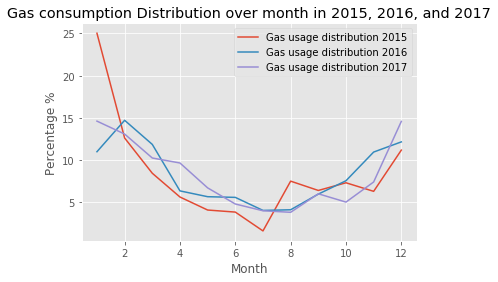

In [9]:
# Data visualization

# Visualize:

# Gas Distribution
month = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
fig, ax = plt.subplots(1, 1)
ax.plot(month, G_dstri_2015_Norm*100, ms = 5, label = 'Gas usage distribution 2015')
ax.plot(month, G_dstri_2016_Norm*100, ms = 5, label = 'Gas usage distribution 2016')
ax.plot(month, G_dstri_2017_Norm*100, ms = 5, label = 'Gas usage distribution 2017')

plt.legend(loc='upper right')
plt.title('Gas consumption Distribution over month in 2015, 2016, and 2017')
plt.ylabel('Percentage %')
plt.xlabel('Month')
plt.show()


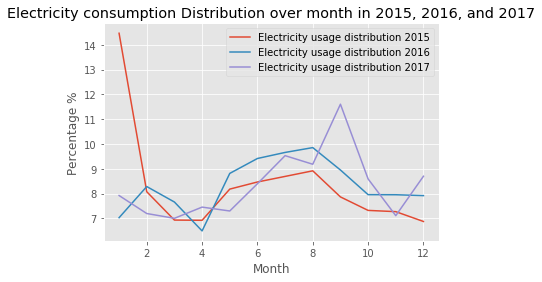

In [10]:
# Electricity Distribution
month = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
fig, ax = plt.subplots(1, 1)
ax.plot(month, E_dstri_2015_Norm*100, ms = 5, label = 'Electricity usage distribution 2015')
ax.plot(month, E_dstri_2016_Norm*100, ms = 5, label = 'Electricity usage distribution 2016')
ax.plot(month, E_dstri_2017_Norm*100, ms = 5, label = 'Electricity usage distribution 2017')

plt.legend(loc='upper right')
plt.title('Electricity consumption Distribution over month in 2015, 2016, and 2017')
plt.ylabel('Percentage %')
plt.xlabel('Month')
plt.show()

In [11]:
# Sample building

#2015: 192
buildingName_2015 = "Building A"
building_2015_sample_G = df2015_BU.loc[192, MonthColumnList_G]
building_2015_sample_E = df2015_BU.loc[192, MonthColumnList_E]


#2016: 306 
buildingName_2016 = "Building B"
building_2016_sample_G = df2016_BU.loc[172, MonthColumnList_G]
building_2016_sample_E = df2016_BU.loc[172, MonthColumnList_E]

#2017: 1689 (2017 The row index is string)
buildingName_2017 = "Building C"
building_2017_sample_G = df2017_BU.loc['1689', MonthColumnList_G]
building_2017_sample_E = df2017_BU.loc['1689', MonthColumnList_E]

print(type(df2016_BU.index))

<class 'pandas.core.indexes.numeric.Int64Index'>


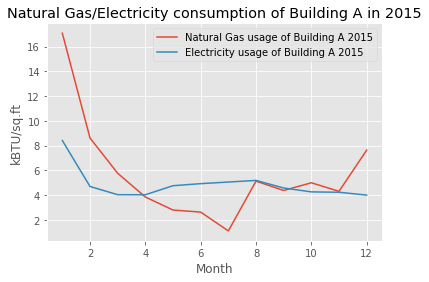

In [12]:
# 2015
fig, ax = plt.subplots(1, 1)
ax.plot(month, building_2015_sample_G, ms = 5, label = 'Natural Gas usage of {} 2015'.format(buildingName_2015))
ax.plot(month, building_2015_sample_E, ms = 5, label = 'Electricity usage of {} 2015'.format(buildingName_2015))

plt.legend(loc='upper right')
plt.title('Natural Gas/Electricity consumption of {} in 2015'.format(buildingName_2015))
plt.ylabel('kBTU/sq.ft')
plt.xlabel('Month')
plt.show()

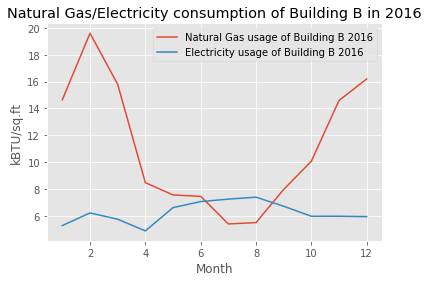

In [13]:
# 2016
fig, ax = plt.subplots(1, 1)
ax.plot(month, building_2016_sample_G, ms = 5, label = 'Natural Gas usage of {} 2016'.format(buildingName_2016))
ax.plot(month, building_2016_sample_E, ms = 5, label = 'Electricity usage of {} 2016'.format(buildingName_2016))

plt.legend(loc='upper right')
plt.title('Natural Gas/Electricity consumption of {} in 2016'.format(buildingName_2016))
plt.ylabel('kBTU/sq.ft')
plt.xlabel('Month')
plt.show()

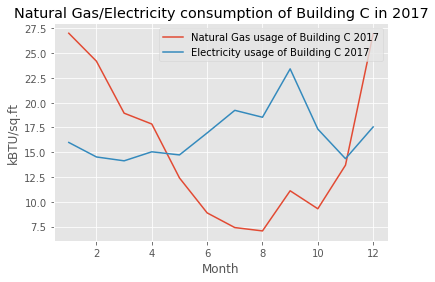

In [14]:
# 2017
fig, ax = plt.subplots(1, 1)
ax.plot(month, building_2017_sample_G, ms = 5, label = 'Natural Gas usage of {} 2017'.format(buildingName_2017))
ax.plot(month, building_2017_sample_E, ms = 5, label = 'Electricity usage of {} 2017'.format(buildingName_2017))

plt.legend(loc='upper right')
plt.title('Natural Gas/Electricity consumption of {} in 2017'.format(buildingName_2017))
plt.ylabel('kBTU/sq.ft')
plt.xlabel('Month')
plt.show()

In [15]:
# # Extracting only Property Name and Year Built (2015)
# df2015_age = pd.read_csv('df2015_BU_building.csv', usecols=[2, 12])
# df2015_age.to_csv('df2015_age.csv')

# # Extracting only Property Name and Year Built (2016)
# df2015_age = pd.read_csv('df2016_BU_building.csv', usecols=[2, 12])
# df2015_age.to_csv('df2016_age.csv')

# # Extracting only Property Name and Year Built (2017)
# df2015_age = pd.read_csv('df2017_BU_building.csv', usecols=[2, 12])
# df2015_age.to_csv('df2017_age.csv')

# # Extracting only Property Name and Property Uses (2015)
# df2015_puse = pd.read_csv('df2015_BU_building.csv', usecols=[2, 11])
# df2015_puse.to_csv('df2015_puse.csv')

# # Extracting only Property Name and Property Uses (2016)
# df2016_puse = pd.read_csv('df2016_BU_building.csv', usecols=[2, 11])
# df2016_puse.to_csv('df2016_puse.csv')

# # Extracting only Property Name and Property Uses (2017)
# df2017_puse = pd.read_csv('df2017_BU_building.csv', usecols=[2, 11])
# df2017_puse.to_csv('df2017_puse.csv')



# New csv for factor GHGI of 2015 BU campus
df2015_BU['GHG Intensity (kgCO2/sf)'] = pd.to_numeric(df2015_BU['GHG Intensity (kgCO2/sf)'], errors='coerce')
# df2015_BU['GHGI'] = df2015_BU['GHG Intensity (kgCO2/sf)'] / df2015_BU['G_EUI']
# df2015_BU['GHGI'] = df2015_BU['GHG Intensity (kgCO2/sf)'] / 12

# New csv for factor GHGI of 2016 BU campus
df2016_BU['GHG Intensity (kgCO2/sf)'] = pd.to_numeric(df2016_BU['GHG Intensity (kgCO2/sf)'], errors='coerce')
# df2016_BU['GHGI'] = df2016_BU['GHG Intensity (kgCO2/sf)'] / df2016_BU['G_EUI']
# df2016_BU['GHGI'] = df2016_BU['GHG Intensity (kgCO2/sf)'] / 12

# New csv for factor GHGI of 2017 BU campus
df2017_BU['GHG Intensity (kgCO2/sf)'] = pd.to_numeric(df2017_BU['GHG Intensity (kgCO2/sf)'], errors='coerce')
# df2017_BU['GHGI'] = df2017_BU['GHG Intensity (kgCO2/sf)'] / df2017_BU['G_EUI']
# df2017_BU['GHGI'] = df2017_BU['GHG Intensity (kgCO2/sf)'] / 12


# Extracting Water use intensity
df2015_BU['Water Intensity (gal/sf)_num'] = pd.to_numeric(df2015_BU['Water Intensity (gal/sf)'], errors='coerce')
df2016_BU['Water Intensity (gal/sf)_num'] = pd.to_numeric(df2016_BU['Water Intensity (gal/sf)'], errors='coerce')
df2017_BU['Water Intensity (gal/sf)_num'] = pd.to_numeric(df2017_BU['Water Intensity (gal/sf)'], errors='coerce')

# df2015_BU['Water Intensity (gal/sf)_num'] /= 12
# df2016_BU['Water Intensity (gal/sf)_num'] /= 12
# df2017_BU['Water Intensity (gal/sf)_num'] /= 12


# Distribution of WI over Month:
water_2015 = np.array([59.853, 62.381, 63.613, 65.862, 66.736, 64.069, 70.953, 70.661, 70.838, 64.523, 61.380, 58.546])
water_2016 = np.array([60.233, 63.105, 61.235, 62.388, 64.691, 69.815, 73.377, 74.235, 69.662, 65.236, 62.026, 60.076])
water_2017 = np.array([58.794, 58.897, 59.538, 61.281, 61.609, 67.360, 68.458, 68.996, 66.994, 65.204, 60.819, 58.556])


# Distribution of GHGI over Month:
GHGI_2015 = np.array([399.98, 400.28, 401.54, 403.28, 403.96, 402.80, 401.31, 398.93, 397.63, 398.29, 400.16, 401.85])
GHGI_2016 = np.array([402.52, 404.04, 404.83, 407.42, 407.70, 406.81, 404.39, 402.25, 401.03, 401.57, 403.53, 404.42])
GHGI_2017 = np.array([406.13, 406.42, 407.18, 409.00, 409.65, 408.84, 407.07, 405.07, 403.38, 403.64, 405.14, 406.82])




In [16]:
# Normalize water/GHGI distribution

water_2015 = np.reshape(water_2015, (water_2015.shape[0], 1))
water_2016 = np.reshape(water_2016, (water_2016.shape[0], 1))
water_2017 = np.reshape(water_2017, (water_2017.shape[0], 1))

print(water_2015.shape)
print(water_2016.shape)
print(water_2017.shape)

water_2015_Norm = normalize(water_2015, norm='l1', axis = 0)
water_2016_Norm = normalize(water_2016, norm='l1', axis = 0)
water_2017_Norm = normalize(water_2017, norm='l1', axis = 0)

print(water_2015_Norm)
print(water_2016_Norm)
print(water_2017_Norm)

print('-----------------------------------------------------')

GHGI_2015 = np.reshape(GHGI_2015, (GHGI_2015.shape[0], 1))
GHGI_2016 = np.reshape(GHGI_2016, (GHGI_2016.shape[0], 1))
GHGI_2017 = np.reshape(GHGI_2017, (GHGI_2017.shape[0], 1))

print(GHGI_2015.shape)
print(GHGI_2016.shape)
print(GHGI_2017.shape)

GHGI_2015_Norm = normalize(GHGI_2015, norm='l1', axis = 0)
GHGI_2016_Norm = normalize(GHGI_2016, norm='l1', axis = 0)
GHGI_2017_Norm = normalize(GHGI_2017, norm='l1', axis = 0)

print(GHGI_2015_Norm)
print(GHGI_2016_Norm)
print(GHGI_2017_Norm)


(12, 1)
(12, 1)
(12, 1)
[[ 0.07679221]
 [ 0.08003567]
 [ 0.08161634]
 [ 0.08450184]
 [ 0.08562319]
 [ 0.08220139]
 [ 0.09103366]
 [ 0.09065902]
 [ 0.09088611]
 [ 0.08278388]
 [ 0.07875137]
 [ 0.07511531]]
[[ 0.07662461]
 [ 0.08027819]
 [ 0.0778993 ]
 [ 0.07936607]
 [ 0.0822958 ]
 [ 0.08881423]
 [ 0.09334558]
 [ 0.09443707]
 [ 0.08861959]
 [ 0.08298911]
 [ 0.07890556]
 [ 0.07642489]]
[[ 0.07771782]
 [ 0.07785398]
 [ 0.07870129]
 [ 0.08100531]
 [ 0.08143888]
 [ 0.08904093]
 [ 0.09049234]
 [ 0.09120351]
 [ 0.08855713]
 [ 0.08619099]
 [ 0.0803946 ]
 [ 0.07740322]]
-----------------------------------------------------
(12, 1)
(12, 1)
(12, 1)
[[ 0.08315575]
 [ 0.08321812]
 [ 0.08348008]
 [ 0.08384182]
 [ 0.08398319]
 [ 0.08374203]
 [ 0.08343226]
 [ 0.08293746]
 [ 0.08266719]
 [ 0.0828044 ]
 [ 0.08319317]
 [ 0.08354452]]
[[ 0.08298509]
 [ 0.08329846]
 [ 0.08346133]
 [ 0.08399529]
 [ 0.08405302]
 [ 0.08386953]
 [ 0.08337061]
 [ 0.08292942]
 [ 0.0826779 ]
 [ 0.08278923]
 [ 0.08319331]
 [ 0.0833

In [17]:
#Monthly distribution of Water Intensity in each BU property in 2015
df2015_BU['WI_Jan'] = df2015_BU['Water Intensity (gal/sf)_num'] * water_2015_Norm[0] 
df2015_BU['WI_Feb'] = df2015_BU['Water Intensity (gal/sf)_num'] * water_2015_Norm[1] 
df2015_BU['WI_Mar'] = df2015_BU['Water Intensity (gal/sf)_num'] * water_2015_Norm[2]
df2015_BU['WI_Apr'] = df2015_BU['Water Intensity (gal/sf)_num'] * water_2015_Norm[3] 
df2015_BU['WI_May'] = df2015_BU['Water Intensity (gal/sf)_num'] * water_2015_Norm[4]
df2015_BU['WI_Jun'] = df2015_BU['Water Intensity (gal/sf)_num'] * water_2015_Norm[5]
df2015_BU['WI_Jul'] = df2015_BU['Water Intensity (gal/sf)_num'] * water_2015_Norm[6]
df2015_BU['WI_Aug'] = df2015_BU['Water Intensity (gal/sf)_num'] * water_2015_Norm[7]
df2015_BU['WI_Sep'] = df2015_BU['Water Intensity (gal/sf)_num'] * water_2015_Norm[8]
df2015_BU['WI_Oct'] = df2015_BU['Water Intensity (gal/sf)_num'] * water_2015_Norm[9]
df2015_BU['WI_Nov'] = df2015_BU['Water Intensity (gal/sf)_num'] * water_2015_Norm[10] 
df2015_BU['WI_Dec'] = df2015_BU['Water Intensity (gal/sf)_num'] * water_2015_Norm[11] 

#Monthly distribution of Water Intensity in each BU property in 2016
df2016_BU['WI_Jan'] = df2016_BU['Water Intensity (gal/sf)_num'] * water_2016_Norm[0] 
df2016_BU['WI_Feb'] = df2016_BU['Water Intensity (gal/sf)_num'] * water_2016_Norm[1] 
df2016_BU['WI_Mar'] = df2016_BU['Water Intensity (gal/sf)_num'] * water_2016_Norm[2]
df2016_BU['WI_Apr'] = df2016_BU['Water Intensity (gal/sf)_num'] * water_2016_Norm[3] 
df2016_BU['WI_May'] = df2016_BU['Water Intensity (gal/sf)_num'] * water_2016_Norm[4]
df2016_BU['WI_Jun'] = df2016_BU['Water Intensity (gal/sf)_num'] * water_2016_Norm[5]
df2016_BU['WI_Jul'] = df2016_BU['Water Intensity (gal/sf)_num'] * water_2016_Norm[6]
df2016_BU['WI_Aug'] = df2016_BU['Water Intensity (gal/sf)_num'] * water_2016_Norm[7]
df2016_BU['WI_Sep'] = df2016_BU['Water Intensity (gal/sf)_num'] * water_2016_Norm[8]
df2016_BU['WI_Oct'] = df2016_BU['Water Intensity (gal/sf)_num'] * water_2016_Norm[9]
df2016_BU['WI_Nov'] = df2016_BU['Water Intensity (gal/sf)_num'] * water_2016_Norm[10] 
df2016_BU['WI_Dec'] = df2016_BU['Water Intensity (gal/sf)_num'] * water_2016_Norm[11] 

#Monthly distribution of Water Intensity in each BU property in 2017
df2017_BU['WI_Jan'] = df2017_BU['Water Intensity (gal/sf)_num'] * water_2017_Norm[0] 
df2017_BU['WI_Feb'] = df2017_BU['Water Intensity (gal/sf)_num'] * water_2017_Norm[1] 
df2017_BU['WI_Mar'] = df2017_BU['Water Intensity (gal/sf)_num'] * water_2017_Norm[2]
df2017_BU['WI_Apr'] = df2017_BU['Water Intensity (gal/sf)_num'] * water_2017_Norm[3] 
df2017_BU['WI_May'] = df2017_BU['Water Intensity (gal/sf)_num'] * water_2017_Norm[4]
df2017_BU['WI_Jun'] = df2017_BU['Water Intensity (gal/sf)_num'] * water_2017_Norm[5]
df2017_BU['WI_Jul'] = df2017_BU['Water Intensity (gal/sf)_num'] * water_2017_Norm[6]
df2017_BU['WI_Aug'] = df2017_BU['Water Intensity (gal/sf)_num'] * water_2017_Norm[7]
df2017_BU['WI_Sep'] = df2017_BU['Water Intensity (gal/sf)_num'] * water_2017_Norm[8]
df2017_BU['WI_Oct'] = df2017_BU['Water Intensity (gal/sf)_num'] * water_2017_Norm[9]
df2017_BU['WI_Nov'] = df2017_BU['Water Intensity (gal/sf)_num'] * water_2017_Norm[10] 
df2017_BU['WI_Dec'] = df2017_BU['Water Intensity (gal/sf)_num'] * water_2017_Norm[11] 

In [18]:
#Monthly distribution of Water Intensity in each BU property in 2015

df2015_BU['GHGI_Jan'] = df2015_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2015_Norm[0]
df2015_BU['GHGI_Feb'] = df2015_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2015_Norm[1]
df2015_BU['GHGI_Mar'] = df2015_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2015_Norm[2]
df2015_BU['GHGI_Apr'] = df2015_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2015_Norm[3]
df2015_BU['GHGI_May'] = df2015_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2015_Norm[4]
df2015_BU['GHGI_Jun'] = df2015_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2015_Norm[5]
df2015_BU['GHGI_Jul'] = df2015_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2015_Norm[6]
df2015_BU['GHGI_Aug'] = df2015_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2015_Norm[7]
df2015_BU['GHGI_Sep'] = df2015_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2015_Norm[8]
df2015_BU['GHGI_Oct'] = df2015_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2015_Norm[9]
df2015_BU['GHGI_Nov'] = df2015_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2015_Norm[10]
df2015_BU['GHGI_Dec'] = df2015_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2015_Norm[11]


#Monthly distribution of Water Intensity in each BU property in 2016
df2016_BU['GHGI_Jan'] = df2016_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2016_Norm[0]
df2016_BU['GHGI_Feb'] = df2016_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2016_Norm[1]
df2016_BU['GHGI_Mar'] = df2016_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2016_Norm[2]
df2016_BU['GHGI_Apr'] = df2016_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2016_Norm[3]
df2016_BU['GHGI_May'] = df2016_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2016_Norm[4]
df2016_BU['GHGI_Jun'] = df2016_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2016_Norm[5]
df2016_BU['GHGI_Jul'] = df2016_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2016_Norm[6]
df2016_BU['GHGI_Aug'] = df2016_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2016_Norm[7]
df2016_BU['GHGI_Sep'] = df2016_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2016_Norm[8]
df2016_BU['GHGI_Oct'] = df2016_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2016_Norm[9]
df2016_BU['GHGI_Nov'] = df2016_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2016_Norm[10]
df2016_BU['GHGI_Dec'] = df2016_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2016_Norm[11]

#Monthly distribution of Water Intensity in each BU property in 2017
df2017_BU['GHGI_Jan'] = df2017_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2017_Norm[0]
df2017_BU['GHGI_Feb'] = df2017_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2017_Norm[1]
df2017_BU['GHGI_Mar'] = df2017_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2017_Norm[2]
df2017_BU['GHGI_Apr'] = df2017_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2017_Norm[3]
df2017_BU['GHGI_May'] = df2017_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2017_Norm[4]
df2017_BU['GHGI_Jun'] = df2017_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2017_Norm[5]
df2017_BU['GHGI_Jul'] = df2017_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2017_Norm[6]
df2017_BU['GHGI_Aug'] = df2017_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2017_Norm[7]
df2017_BU['GHGI_Sep'] = df2017_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2017_Norm[8]
df2017_BU['GHGI_Oct'] = df2017_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2017_Norm[9]
df2017_BU['GHGI_Nov'] = df2017_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2017_Norm[10]
df2017_BU['GHGI_Dec'] = df2017_BU['GHG Intensity (kgCO2/sf)'] * GHGI_2017_Norm[11]

## Extract the 5 Factors and Monthly Consumption

In [19]:
# Combine all 4 factors

df2015_BU_analysis = df2015_BU[['Property Name', 'Year Built', 'Property Uses','E_Jan','E_Feb','E_Mar','E_Apr','E_May','E_Jun','E_Jul','E_Aug','E_Sep','E_Oct','E_Nov','E_Dec', 'G_Jan','G_Feb','G_Mar','G_Apr','G_May','G_Jun','G_Jul','G_Aug','G_Sep','G_Oct','G_Nov','G_Dec','WI_Jan','WI_Feb','WI_Mar','WI_Apr','WI_May','WI_Jun','WI_Jul','WI_Aug','WI_Sep','WI_Oct','WI_Nov','WI_Dec', 'GHGI_Jan','GHGI_Feb','GHGI_Mar','GHGI_Apr','GHGI_May','GHGI_Jun','GHGI_Jul','GHGI_Aug','GHGI_Sep','GHGI_Oct','GHGI_Nov','GHGI_Dec']] 
df2016_BU_analysis = df2016_BU[['Property Name', 'Year Built', 'Property Uses','E_Jan','E_Feb','E_Mar','E_Apr','E_May','E_Jun','E_Jul','E_Aug','E_Sep','E_Oct','E_Nov','E_Dec', 'G_Jan','G_Feb','G_Mar','G_Apr','G_May','G_Jun','G_Jul','G_Aug','G_Sep','G_Oct','G_Nov','G_Dec','WI_Jan','WI_Feb','WI_Mar','WI_Apr','WI_May','WI_Jun','WI_Jul','WI_Aug','WI_Sep','WI_Oct','WI_Nov','WI_Dec', 'GHGI_Jan','GHGI_Feb','GHGI_Mar','GHGI_Apr','GHGI_May','GHGI_Jun','GHGI_Jul','GHGI_Aug','GHGI_Sep','GHGI_Oct','GHGI_Nov','GHGI_Dec']] 
df2017_BU_analysis = df2017_BU[['Property Name', 'Year Built', 'Property Uses','E_Jan','E_Feb','E_Mar','E_Apr','E_May','E_Jun','E_Jul','E_Aug','E_Sep','E_Oct','E_Nov','E_Dec', 'G_Jan','G_Feb','G_Mar','G_Apr','G_May','G_Jun','G_Jul','G_Aug','G_Sep','G_Oct','G_Nov','G_Dec','WI_Jan','WI_Feb','WI_Mar','WI_Apr','WI_May','WI_Jun','WI_Jul','WI_Aug','WI_Sep','WI_Oct','WI_Nov','WI_Dec', 'GHGI_Jan','GHGI_Feb','GHGI_Mar','GHGI_Apr','GHGI_May','GHGI_Jun','GHGI_Jul','GHGI_Aug','GHGI_Sep','GHGI_Oct','GHGI_Nov','GHGI_Dec']] 

# df2015_BU_analysis.to_csv('df_2015_BU_analysis.csv')
# df2016_BU_analysis.to_csv('df_2016_BU_analysis.csv')
# df2017_BU_analysis.to_csv('df_2017_BU_analysis.csv')

In [20]:
# Remove rows that contain null/inf/NaN

df2015_BU_analysis = df2015_BU_analysis.replace(np.inf,np.nan)
df2015_BU_analysis = df2015_BU_analysis.dropna(axis = 0, how = 'any')

df2016_BU_analysis = df2016_BU_analysis.replace(np.inf,np.nan)
df2016_BU_analysis = df2016_BU_analysis.dropna(axis = 0, how = 'any')

df2017_BU_analysis = df2017_BU_analysis.replace(np.inf,np.nan)
df2017_BU_analysis = df2017_BU_analysis.dropna(axis = 0, how = 'any')


In [21]:
# Convert property uses into numerical values
'''
college: 1
sports: 2
residentHousing: 3
laboratory: 4
office: 5
hotel: 6
distribution: 7
food: 8
worship: 9
medical: 10
'''


def indicator_vector(df):
    college = ['College/University', 'College/University, Office, Parking']
    sports = ['Indoor Arena', 'Indoor Arena, Parking', 'Fitness Center/Gym', 'Other - Stadium', 'Fitness Center/Health Club/Gym, Swimming Pool']
    residentHousing = ['Residence Hall/Dormitory', 'Parking, Residence Hall/Dormitory', 'Multifamily Housing']
    laboratory = ['Laboratory']
    office = ['Office', 'Office, Parking']
    hotel = ['Hotel, Parking', 'Hotel']
    distribution = ['Distribution Center, Office, Parking']
    food = ['Food Service, Office']
    worship = ['Worship Facility']
    medical = ['Medical Office, Office']

    #add columns
    df['Uses_College'] = 0
    df['Uses_Sports'] = 0
    df['Uses_ResidentHousing'] = 0
    df['Uses_Laboratory'] = 0
    df['Uses_Office'] = 0
    df['Uses_Hotel'] = 0
    df['Uses_Distribution'] = 0
    df['Uses_Food'] = 0
    df['Uses_Worship'] = 0
    df['Uses_Medical'] = 0
    
    for i in range(len(df)):
        propertyUseStr = df.iloc[i, 2]
    
        if propertyUseStr in college:
            col = df.columns.get_loc('Uses_College')
            df.iloc[i,col] = 1
        elif propertyUseStr in sports:
            col = df.columns.get_loc('Uses_Sports')
            df.iloc[i,col] = 1
        elif propertyUseStr in residentHousing:
            col = df.columns.get_loc('Uses_ResidentHousing')
            df.iloc[i,col] = 1
        elif propertyUseStr in laboratory:
            col = df.columns.get_loc('Uses_Laboratory')
            df.iloc[i,col] = 1
        elif propertyUseStr in office:
            col = df.columns.get_loc('Uses_Office')
            df.iloc[i,col] = 1
        elif propertyUseStr in hotel:
            col = df.columns.get_loc('Uses_Hotel')
            df.iloc[i,col] = 1
        elif propertyUseStr in distribution:
            col = df.columns.get_loc('Uses_Distribution')
            df.iloc[i,col] = 1
        elif propertyUseStr in food:
            col = df.columns.get_loc('Uses_Food')
            df.iloc[i,col] = 1
        elif propertyUseStr in worship:
            col = df.columns.get_loc('Uses_Worship')
            df.iloc[i,col] = 1
        elif propertyUseStr in medical:
            col = df.columns.get_loc('Uses_Medical')
            df.iloc[i,col] = 1
        else:
            print('Error')
        # Should never reach this point
    df.drop(['Property Uses'],axis = 1, inplace = True)
    return df
    
    
# replace Property Uses with indicator vector for 2015 data


df2015_BU_analysis = indicator_vector(df2015_BU_analysis)
print('df2015_BU_analysis')
print(df2015_BU_analysis) 
print('-------------------------------------------------')
df2016_BU_analysis = indicator_vector(df2016_BU_analysis)
print('df2016_BU_analysis')
print(df2016_BU_analysis) 
print('-------------------------------------------------')
df2017_BU_analysis = indicator_vector(df2017_BU_analysis)
print('df2017_BU_analysis')
print(df2017_BU_analysis) 
print('-------------------------------------------------')
    

# df2015_BU_analysis.to_csv('df_2015_BU_analysis.csv')
# df2016_BU_analysis.to_csv('df_2016_BU_analysis.csv')
# df2017_BU_analysis.to_csv('df_2017_BU_analysis.csv')

df2015_BU_analysis
                                         Property Name  Year Built      E_Jan  \
52           111 Cummington Street (664-666 Comm. Ave)      1911.0  14.668765   
54                                  300 Babcock Street      1986.0   3.770724   
55          605-615 Commonwealth Avenue (2 Silber Way)      1981.0   4.014025   
56                         622-640 Commonwealth Avenue      1902.0   6.111732   
58                             64-86 Cummington Street      1909.0   4.303034   
63         785 Commonwealth Avenue (1 University Road)      1931.0   5.722914   
65                             871 Commonwealth Avenue      1926.0   3.172743   
141                            915 Commonwealth Avenue      2004.0  12.354083   
192                                 Hotel Commonwealth      2002.0   8.410503   
199                           285 Babcock, Case Center      1972.0   7.452344   
200                            925 Commonwealth Avenue      2004.0  11.159712   
365      

Weather Data:

https://www.usclimatedata.com/climate/boston/massachusetts/united-states/usma0046/2015/1
https://www.usclimatedata.com/climate/boston/massachusetts/united-states/usma0046/2016/1
https://www.usclimatedata.com/climate/boston/massachusetts/united-states/usma0046/2017/1

In [22]:
# Generate data frame of weather data
# Avg_Temp_xlsx = pd.read_excel('Avg_Temp.xlsx', index_col=None)
# Avg_Temp_xlsx.to_csv('Avg_Temp.csv')

Avg_Temp = pd.read_csv('Avg_Temp.csv', index_col=0)
print(Avg_Temp)


     Jan    Feb    Mar    Apr    May    Jun    Jul    Aug   Sep    Oct    Nov  \
0  26.20  19.10  33.30  48.05  62.30  64.65  73.85  74.65  69.2  54.00  48.55   
1  32.60  34.05  42.55  47.10  58.60  68.40  76.05  76.40  67.5  55.30  46.20   
2  35.15  28.60  34.05  51.65  56.35  69.50  72.50  72.00  67.1  61.35  43.75   

     Dec  
0  45.25  
1  35.35  
2  30.75  


In [23]:
# Add Avg_temp to data frame

for each in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']:
    df2015_BU_analysis[each] = Avg_Temp.loc[0, each]

for each in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']:
    df2016_BU_analysis[each] = Avg_Temp.loc[1, each]
    
for each in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']:
    df2017_BU_analysis[each] = Avg_Temp.loc[2, each]

# df2015_BU_analysis.to_csv('df_2015_BU_analysis.csv')
# df2016_BU_analysis.to_csv('df_2016_BU_analysis.csv') 
# df2017_BU_analysis.to_csv('df_2017_BU_analysis.csv')

In [24]:
# Combine 3 years data
df_BU_analysis_pre = df2015_BU_analysis.append(df2016_BU_analysis)
df_BU_analysis_pre = df_BU_analysis_pre.append(df2017_BU_analysis)

print(len(df_BU_analysis_pre))
#df_BU_analysis_pre.to_csv('df_201x_BU_analysis_combined.csv')
    
    

128


In [25]:
# Helper function for selection column labels
def returnLabelFor_T_WI_GHGI_E_G(i):
    
    if i > 0 and i <= 12:
        return (MonthColumnList_T[i-1], MonthColumnList_WI[i-1], MonthColumnList_GHGI[i-1], MonthColumnList_E[i-1], MonthColumnList_G[i-1])
    else:
        print('Wrong!')
        return (0, 0, 0, 0, 0)

In [26]:
# Produce Final data set for Linear Regression Analysis

# Same Algorithm for Electricity. 
# row format: [Building-Name, Month, Year, Property Uses, Temperature, WI, GHG/GAS, Age, Y_Electric]

df_BU_analysis_E = pd.DataFrame()

dfColumn_E = ['Temperature', 'WI', 'GHGI', 'Age', 'Uses_College', 'Uses_Sports', 'Uses_ResidentHousing', 'Uses_Laboratory', 'Uses_Office', 'Uses_Hotel', 'Uses_Distribution', 'Uses_Food', 'Uses_Worship', 'Uses_Medical', 'Y_Electric']

for _, row in df_BU_analysis_pre.iterrows():
#     print(row['Type Index'])
    
    temp_df = pd.DataFrame(np.zeros((12, 15)), columns = dfColumn_E)
        
    temp_df['Uses_College'] = row['Uses_College']
    temp_df['Uses_Sports'] = row['Uses_Sports']
    temp_df['Uses_ResidentHousing'] = row['Uses_ResidentHousing']
    temp_df['Uses_Laboratory'] = row['Uses_Laboratory']
    temp_df['Uses_Office'] = row['Uses_Office']
    temp_df['Uses_Hotel'] = row['Uses_Hotel']
    temp_df['Uses_Distribution'] = row['Uses_Distribution']
    temp_df['Uses_Food'] = row['Uses_Food']
    temp_df['Uses_Worship'] = row['Uses_Worship']
    temp_df['Uses_Medical'] = row['Uses_Medical']
    
    temp_df['Age'] = row['Year Built']
#     temp_df['GHGI'] = row['GHGI']
#     temp_df['WI'] = row['Water Intensity (gal/sf)_num']
    
    for i in range(0, 12):
        (index_T, index_WI, index_GHGI, index_E, _) = returnLabelFor_T_WI_GHGI_E_G(i+1)
        temp_df.loc[i, 'Temperature'] = row[index_T]
        temp_df.loc[i, 'Y_Electric'] = row[index_E]
        temp_df.loc[i, 'WI'] = row[index_WI]
        temp_df.loc[i, 'GHGI'] = row[index_GHGI]
    
    df_BU_analysis_E = df_BU_analysis_E.append(temp_df)
          
# print(len(df_BU_analysis_E))
    

In [27]:
# Same Algorithm for Gas. 
# row format: [Month, Year, Property Uses, Temperature, WI, GHG/GAS, Age, Y_Gas]

df_BU_analysis_G = pd.DataFrame()

dfColumn_G = ['Temperature', 'WI', 'GHGI', 'Age', 'Uses_College', 'Uses_Sports', 'Uses_ResidentHousing', 'Uses_Laboratory', 'Uses_Office', 'Uses_Hotel', 'Uses_Distribution', 'Uses_Food', 'Uses_Worship', 'Uses_Medical', 'Y_Gas']


for _, row in df_BU_analysis_pre.iterrows():
#     print(row['Type Index'])
    
    temp_df = pd.DataFrame(np.zeros((12, 15)), columns = dfColumn_G)
    
    temp_df['Uses_College'] = row['Uses_College']
    temp_df['Uses_Sports'] = row['Uses_Sports']
    temp_df['Uses_ResidentHousing'] = row['Uses_ResidentHousing']
    temp_df['Uses_Laboratory'] = row['Uses_Laboratory']
    temp_df['Uses_Office'] = row['Uses_Office']
    temp_df['Uses_Hotel'] = row['Uses_Hotel']
    temp_df['Uses_Distribution'] = row['Uses_Distribution']
    temp_df['Uses_Food'] = row['Uses_Food']
    temp_df['Uses_Worship'] = row['Uses_Worship']
    temp_df['Uses_Medical'] = row['Uses_Medical']
    
    temp_df['Age'] = row['Year Built']
#     temp_df['GHGI'] = row['GHGI']
#     temp_df['WI'] = row['Water Intensity (gal/sf)_num']
    
    for i in range(0, 12):
        (index_T, index_WI, index_GHGI, _, index_G) = returnLabelFor_T_WI_GHGI_E_G(i+1)
        temp_df.loc[i, 'Temperature'] = row[index_T]
        temp_df.loc[i, 'Y_Gas'] = row[index_G]
        temp_df.loc[i, 'WI'] = row[index_WI]
        temp_df.loc[i, 'GHGI'] = row[index_GHGI]
    
    df_BU_analysis_G = df_BU_analysis_G.append(temp_df)

      
# print(len(df_BU_analysis_G))


In [28]:
# Drop entries that have 0 value in Y_Electricity and Y_Gas

df_BU_analysis_E = df_BU_analysis_E[df_BU_analysis_E.Y_Electric != 0]
df_BU_analysis_G = df_BU_analysis_G[df_BU_analysis_G.Y_Gas != 0]

# df_BU_analysis_E = df_BU_analysis_E[df_BU_analysis_E.GHGI != 0]
# df_BU_analysis_G = df_BU_analysis_G[df_BU_analysis_G.GHGI != 0]


# df_BU_analysis_E.to_csv('df_201x_BU_analysis_E_Final.csv')
# df_BU_analysis_G.to_csv('df_201x_BU_analysis_G_Final.csv')


## Y (E/G) value modification to discrete value

In [29]:
print(len(df_BU_analysis_E))
print(len(df_BU_analysis_G))

max_E = df_BU_analysis_E['Y_Electric'].max()
min_E = df_BU_analysis_E['Y_Electric'].min()

max_G = df_BU_analysis_G['Y_Gas'].max()
min_G = df_BU_analysis_G['Y_Gas'].min()

print("Electricity: (min: {} - max: {})".format(min_E, max_E))
print("Gas: (min: {} - max: {})".format(min_G, max_G))
print('------------------------------------------------------')

# Split them into 5 groups
# 1. very low consumption, 
# 2. low consumption, 
# 3. medium consumption, 
# 4. large consumption, 
# 5. very large consumption

def consumptionLevel(value, minValue, maxValue, GorE, level = 5):
    
    levelList = ['Y_Very_Low_', 'Y_Low_', 'Y_Medium_', 'Y_High_', 'Y_Very_High_']
    
    accretion = (maxValue - minValue)/level
    
    for i in range(level):
        minV = minValue + i*accretion
        maxV = minValue + (i+1)*accretion
        
        if (minV <= value) and (value <= maxV):
            return levelList[i] + GorE 
        
    return levelList[level-1] + GorE

1512
1404
Electricity: (min: 0.019488557828087425 - max: 24.770220899953948)
Gas: (min: 0.10247534235577173 - max: 57.95955786272719)
------------------------------------------------------


In [30]:
df_BU_analysis_E['Y_Very_Low_E'] = 0
df_BU_analysis_E['Y_Low_E'] = 0
df_BU_analysis_E['Y_Medium_E'] = 0
df_BU_analysis_E['Y_High_E'] = 0
df_BU_analysis_E['Y_Very_High_E'] = 0

df_BU_analysis_G['Y_Very_Low_G'] = 0
df_BU_analysis_G['Y_Low_G'] = 0
df_BU_analysis_G['Y_Medium_G'] = 0
df_BU_analysis_G['Y_High_G'] = 0
df_BU_analysis_G['Y_Very_High_G'] = 0

for i in range(len(df_BU_analysis_E)):
    column_index = df_BU_analysis_E.columns.get_loc("Y_Electric")
    value = df_BU_analysis_E.iloc[i, column_index]
    modify_columnName = consumptionLevel(value, min_E, max_E, 'E')
    
    column_index_level = df_BU_analysis_E.columns.get_loc(modify_columnName)
    df_BU_analysis_E.iloc[i, column_index_level] = 1
    
    
    
for i in range(len(df_BU_analysis_G)):
    
    column_index = df_BU_analysis_G.columns.get_loc("Y_Gas")
    value = df_BU_analysis_G.iloc[i, column_index]
    modify_columnName = consumptionLevel(value, min_G, max_G, 'G')
    
    column_index_level = df_BU_analysis_G.columns.get_loc(modify_columnName)
    df_BU_analysis_G.iloc[i, column_index_level] = 1

df_BU_analysis_E.to_csv('df_201x_BU_analysis_E_Final.csv')
df_BU_analysis_G.to_csv('df_201x_BU_analysis_G_Final.csv')

# df_BU_analysis_E.to_csv('df_201x_BU_analysis_E_Level.csv')
# df_BU_analysis_G.to_csv('df_201x_BU_analysis_G_Level.csv')


# Graph Generation

In [ ]:
import matplotlib.pyplot as plt


# Monthly Weather Distribution
fig, ax = plt.subplots(1, 1)
ax.plot(month, Avg_Temp.iloc[0,:], ms = 5, label = 'Temperature distribution 2015')
ax.plot(month, Avg_Temp.iloc[1,:], ms = 5, label = 'Temperature distribution 2016')
ax.plot(month, Avg_Temp.iloc[2,:], ms = 5, label = 'Temperature distribution 2017')

plt.legend(loc='lower right')
plt.title('Temperature Distribution over month in 2015, 2016, and 2017')
plt.ylabel('Fahrenheit')
plt.xlabel('Month')
plt.show()

In [ ]:
# Property Uses


df_uses = df_BU_analysis_pre.iloc[:, 28:38]

num_uses = []
for i in range(10):
    for j in range(len(df_uses)):
         if df_uses.iloc[j, i] == 1:
                if df_uses.columns[i] == 'Uses_ResidentHousing':
                    num_uses.append('RH')
                if df_uses.columns[i] == 'Uses_College':
                    num_uses.append('Col')
                if df_uses.columns[i] == 'Uses_Sports':
                    num_uses.append('Spo')                
                if df_uses.columns[i] == 'Uses_Laboratory':
                    num_uses.append('Lab')
                if df_uses.columns[i] == 'Uses_Office':
                    num_uses.append('Offi')
                if df_uses.columns[i] == 'Uses_Hotel':
                    num_uses.append('Hot')
                if df_uses.columns[i] == 'Uses_Distribution':
                    num_uses.append('Dis')                    
                if df_uses.columns[i] == 'Uses_Food':
                    num_uses.append('Food')                    
                if df_uses.columns[i] == 'Uses_Worship':
                    num_uses.append('Wor')                    
                if df_uses.columns[i] == 'Uses_Medical':
                    num_uses.append('Med')                    
                    
fig, ax = plt.subplots(1,1)
ax.hist(num_uses,bins = 25)

plt.title('BU Campus Property Uses Distribution')
plt.ylabel('Number')
plt.xlabel('Property Uses')
plt.show()


In [ ]:
# Age

#separate building into different group according to every 25 years more of age

lst_age = list(df_BU_analysis_pre['Year Built'])
lst_age = [int(x) for x in lst_age]


age = min(lst_age)

def grouping(min_age, max_age, lst):
    num = 0
    for x in lst:
        if x >= min_age and x < max_age:
            num += 1
    return num

# 1887 - 1912(excludeded)

# 1912 - 1937(excludeded)

# 1937 - 1962(excludeded)

# 1962 - 1987(excludeded)

# 1987 - 2012(includeded)

group = []
while age < 2013:
    if age < 1987:
        max_age = age + 25
    else:
        max_age = age + 26
    num_age = grouping(age, max_age, lst_age)
    group.append(num_age)
    age = max_age




fig, ax = plt.subplots(1, 1)
year = np.array(['1887-1912', '1912-1937', '1937-1962','1962-1987','1987-2012'])
ax.vlines(year,0,group,'b')

ax.plot()
plt.title('5 Age Groups of BU Campus Building')
plt.ylabel('Number')
plt.xlabel('Year Group')
plt.show()




In [ ]:
#Weights

def normalize(df_coef):
    #df_coef     -   (1, 14)
    
    df = df_coef.copy()
    
    
    fmean = np.mean(df.iloc[0,:])
    frange = np.amax(df.iloc[0,:]) - np.amin(df.iloc[0,:])

    #Vector Subtraction
    df.iloc[0,:] -= fmean

    #Vector Division
    df.iloc[0,:] /= frange

    return df

df_coef_E_norm = normalize(df_coef_E)
df_coef_G_norm = normalize(df_coef_G)



In [ ]:
#Graph of weights

Weights = ['Temp', 'WI', 'GHGI', 'Age', 'Col', 'Spo', 'RH', 'Lab', 'Off', 'Hot', 'Dist', 'Food', 'Wor', 'Med']



fig, ax = plt.subplots(1, 1)
ax.vlines(Weights,0, df_coef_E_norm.iloc[0,:],'r')
ax.vlines(Weights,0, df_coef_G_norm.iloc[0,:],'b')

plt.title('Weights for Energy Consumption Prediction')
plt.ylabel('Normed Weights')
plt.xlabel('Features')
plt.show()